# 🧠 MNIST Digit Classification using CNN (Keras + TensorFlow)

In this notebook, we'll use a Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset.

---

## 📚 What is MNIST?
The MNIST dataset contains **70,000 grayscale images** of handwritten digits (0 through 9), each of size **28×28 pixels**.

- 60,000 images for training
- 10,000 images for testing

It's a classic benchmark dataset in computer vision and deep learning.


In [ ]:
# Install TensorFlow (uncomment if running on Colab)
# !pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


## 📥 Load and Preprocess the MNIST Data

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Expand dimensions for channel
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (60000, 28, 28, 1)
Testing shape: (10000, 28, 28, 1)


## 👀 Visualize Sample Training Images
> Add blockquote



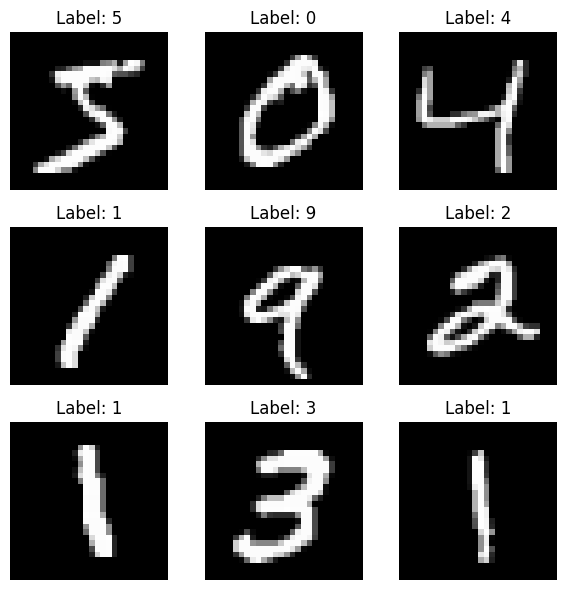

In [ ]:
# Display first 9 training images with labels
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 🧱 Define the CNN Model

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # Convolutional layer: learn 32 filters (3×3) to detect local patterns, ReLU activation for non-linearity
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # Max‐Pooling layer: downsample by a factor of 2 to reduce spatial dimensions and control overfitting
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer: learn 64 filters (3×3) for more complex feature extraction, ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Second Max‐Pooling layer: further downsample feature maps, retaining most salient information
    layers.MaxPooling2D((2, 2)),

    # Flatten layer: convert the 2D feature maps into a 1D feature vector for the dense layers
    layers.Flatten(),

    # Dense (fully‐connected) layer: 64 neurons to learn global combinations of features, ReLU activation
    layers.Dense(64, activation='relu'),

    # Output layer: 10 neurons (one per digit class 0–9) with softmax activation to produce probability distribution
    layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)


### Layer-by-Layer Breakdown

1. **Conv2D (conv2d_2)**  
   - **Output Shape**: `(None, 26, 26, 32)`  
     - Input 28×28 → with a 3×3 kernel and no padding → 26×26 feature maps  
     - 32 different filters  
   - **Params**: 320 = (3×3 kernel × 1 input channel × 32 filters) + 32 biases  

2. **MaxPooling2D (max_pooling2d_2)**  
   - **Output Shape**: `(None, 13, 13, 32)`  
     - Downsamples by factor of 2 (26→13)  
   - **Params**: 0 (pooling has no learnable weights)  

3. **Conv2D (conv2d_3)**  
   - **Output Shape**: `(None, 11, 11, 64)`  
     - Input 13×13 → 3×3 kernel → 11×11 feature maps  
     - 64 filters  
   - **Params**: 18,496 = (3×3 × 32 input channels × 64 filters) + 64 biases  

4. **MaxPooling2D (max_pooling2d_3)**  
   - **Output Shape**: `(None, 5, 5, 64)`  
     - Downsamples 11→5 (floor division)  
   - **Params**: 0  

5. **Flatten (flatten_1)**  
   - **Output Shape**: `(None, 1600)`  
     - Flattens 5×5×64 → 1,600-dimensional vector  
   - **Params**: 0  

6. **Dense (dense_2)**  
   - **Output Shape**: `(None, 64)`  
   - **Params**: 102,464 = (1,600 inputs × 64 units) + 64 biases  

7. **Dense (dense_3)**  
   - **Output Shape**: `(None, 10)`  
     - Final classification into 10 digit classes  
   - **Params**: 650 = (64 inputs × 10 units) + 10 biases  

---

### ⚖️ Total Parameters

- **Total params**: 121,930  
- **Trainable params**: 121,930 (all layers are updated during training)  
- **Non-trainable params**: 0  

This summary shows how the spatial dimensions shrink and the feature depth grows through the network, and how most parameters reside in the fully connected layer.  


## ⚙️ Compile the Model

Optimizer: how the weights are updated (e.g., Adam, SGD, RMSprop)

Loss: how the error is measured (see below)

Metrics: what performance indicators to track (e.g., accuracy, MAE)

### Choosing the Right Loss Function


| Loss Function                     | Use Case                                                                 |
|-----------------------------------|--------------------------------------------------------------------------|
| **binary_crossentropy**           | Binary classification (2 classes, labels 0 or 1)                         |
| **categorical_crossentropy**      | Multi-class classification with **one-hot encoded** labels               |
| **sparse_categorical_crossentropy** | Multi-class classification with **integer** labels (no one-hot needed)    |
| **mean_squared_error** (MSE)      | Regression tasks (predict continuous values)                             |
| **mean_absolute_error** (MAE)     | Regression, more robust to outliers                           

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## 🏋️ Train the Model

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=3,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.8828 - loss: 0.3915 - val_accuracy: 0.9790 - val_loss: 0.0675
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9818 - loss: 0.0562 - val_accuracy: 0.9862 - val_loss: 0.0456
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9895 - loss: 0.0342 - val_accuracy: 0.9883 - val_loss: 0.0402


## ✅ Evaluate on Test Set

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9870 - loss: 0.0376
Test accuracy: 0.9894


## 📈 Training and Validation Accuracy

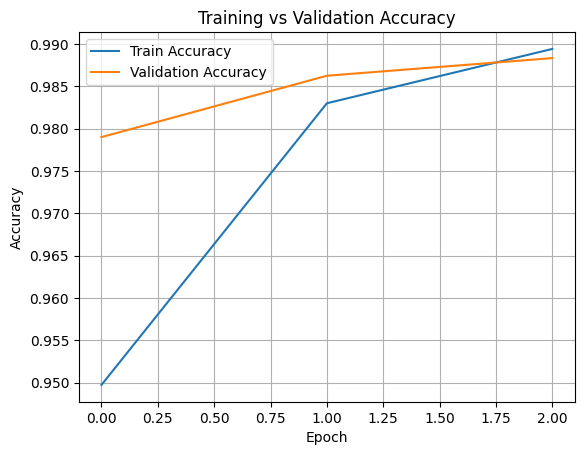

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## 🎯 Visualize Model Predictions on Test Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


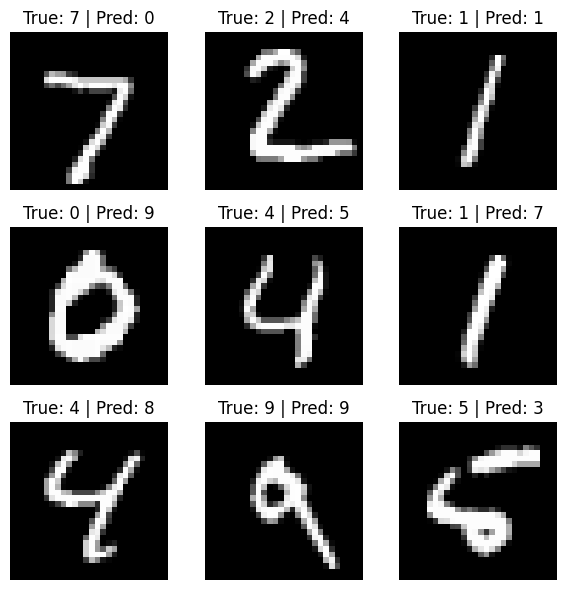

In [ ]:
# Display first 9 test images with model predictions
k=55
preds = model.predict(x_test[0:9])##(x_test[k:k+9])
preds_classes = np.argmax(preds, axis=1)

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"True: {y_test[i]} | Pred: {preds_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 🧪 Student Task

Try modifying the CNN model architecture or training settings. Here are some ideas:

✅ **Model Modifications**:
- Add a third `Conv2D` layer
- Try using a different number of filters (e.g., 16, 128)
- Try `Dropout()` after the dense layer to reduce overfitting

✅ **Training Modifications**:
- Train for more epochs (e.g., 10 instead of 3)
- Change the optimizer (e.g., `SGD` instead of `Adam`)
- Try different activation functions (e.g., `tanh` instead of `relu`)

Then answer:
- What changes improved accuracy?
- What did not help?
- Why do you think that happened?

📝 **Document your experiments and observations in new cells below.**
